In [2]:
import os
import cv2
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt


In [3]:
image_dir = r'D:\FracAtlas_extracted\FracAtlas\images\Fractured'
xml_dir = r'D:\FracAtlas_extracted\FracAtlas\Annotations\PASCAL VOC'

class_map = { "fracture": 1}

xml_files = sorted([f for f in os.listdir(xml_dir) if f.endswith('.xml')])

print(f"Found {len(xml_files)} XML files in {xml_dir}")

Found 4083 XML files in D:\FracAtlas_extracted\FracAtlas\Annotations\PASCAL VOC


In [5]:
for idx, xml_file in enumerate(xml_files[:5]):
    xml_path = os.path.join(xml_dir, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    filename = root.find('filename').text
    image_path = os.path.join(image_dir, filename)
    
    print(f"\nProcessing image {idx+1}: {filename}")
    print(f"Image path: {image_path}")
    print(f"XML path: {xml_path}")
    
    
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        print(f"Error: Could not read image {image_path}")
        continue
    image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    height, width = image.shape[:2]
    
    mask = np.zeros((height, width), dtype=np.uint8)
    objects = []
    
    for obj in root.findall('object'):
        label = obj.find('name').text
        bbox = obj.find('bndbox')
        
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        
        objects.append((label, xmin, ymin, xmax, ymax))
        
    print("parsed objects:", objects)
    
    
    #fill mask
    for (label, xmin, ymin, xmax, ymax) in objects:
        class_id = class_map.get(label, None)
        if class_id is None:
            print(f"skipping unknown  label: {label}")
            continue
        
        xmin_clamped = max(0, min(xmin, width -1))
        ymin_clamped = max(0, min(ymin, height -1))
        xmax_clamped = max(0, min(xmax, width -1))
        ymax_clamped = max(0, min(ymax, height -1))
    
        if xmax_clamped <= xmin_clamped or ymax_clamped <= ymin_clamped:
            print(f"Invalid bbox for {label}, skipped")
            continue
        
        mask[ymin_clamped:ymax_clamped, xmin_clamped:xmax_clamped] = class_id
        
        
        colored_mask = np.zeros_like(image)
        colored_mask[mask == 1] = [255, 0, 0]  # Red for fractures
        
        alpha = 0.5
        
        overlay = (image * (1 - alpha) + colored_mask * alpha).astype(np.uint8)
        
        
        for (label, xmin, ymin, xmax, ymax) in objects:
            cv2.rectangle(overlay, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            cv2.putText(overlay, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            
            
            plt.figure(figsize = (9,3))
            plt.subplot(1,3,1)
            plt.imshow(image)
            plt.title('Original Image')
            plt.axis('off')
            
            plt.subplot(1,3,2)
            plt.imshow(mask, cmap='gray')
            plt.title('Mask')
            plt.axis('off')
            
            plt.subplot(1,3,3)
            plt.imshow(overlay)
            plt.title('Overlay')
            plt.axis('off')
            
            plt.tight_layout()
            plt.show()
            
                        


Processing image 1: IMG0000000.jpg
Image path: D:\FracAtlas_extracted\FracAtlas\images\Fractured\IMG0000000.jpg
XML path: D:\FracAtlas_extracted\FracAtlas\Annotations\PASCAL VOC\IMG0000000.xml
Error: Could not read image D:\FracAtlas_extracted\FracAtlas\images\Fractured\IMG0000000.jpg

Processing image 2: IMG0000001.jpg
Image path: D:\FracAtlas_extracted\FracAtlas\images\Fractured\IMG0000001.jpg
XML path: D:\FracAtlas_extracted\FracAtlas\Annotations\PASCAL VOC\IMG0000001.xml
Error: Could not read image D:\FracAtlas_extracted\FracAtlas\images\Fractured\IMG0000001.jpg

Processing image 3: IMG0000002.jpg
Image path: D:\FracAtlas_extracted\FracAtlas\images\Fractured\IMG0000002.jpg
XML path: D:\FracAtlas_extracted\FracAtlas\Annotations\PASCAL VOC\IMG0000002.xml
Error: Could not read image D:\FracAtlas_extracted\FracAtlas\images\Fractured\IMG0000002.jpg

Processing image 4: IMG0000003.jpg
Image path: D:\FracAtlas_extracted\FracAtlas\images\Fractured\IMG0000003.jpg
XML path: D:\FracAtlas_ext


📌 Processing fractured image 1: IMG0000019.jpg
Parsed objects: [('fractured', 1242, 929, 1515, 1076)]


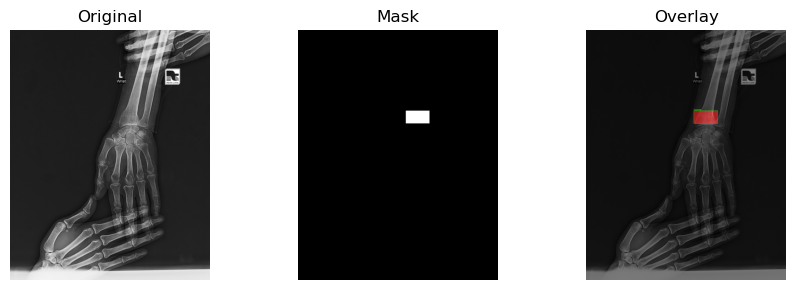


📌 Processing fractured image 2: IMG0000025.jpg
Parsed objects: [('fractured', 1466, 2010, 1621, 2163)]


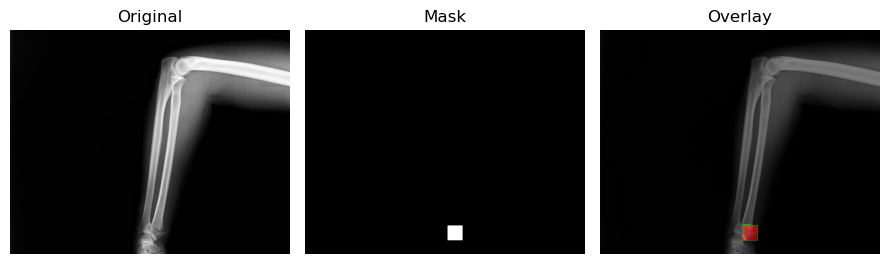


📌 Processing fractured image 3: IMG0000044.jpg
Parsed objects: [('fractured', 1426, 1072, 1570, 1188)]


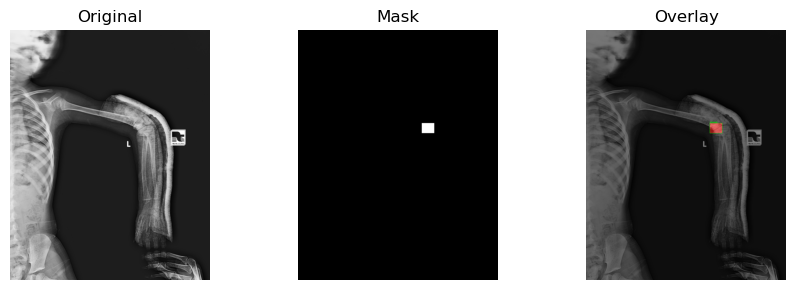


📌 Processing fractured image 4: IMG0000057.jpg
Parsed objects: [('fractured', 1130, 1119, 1270, 1218)]


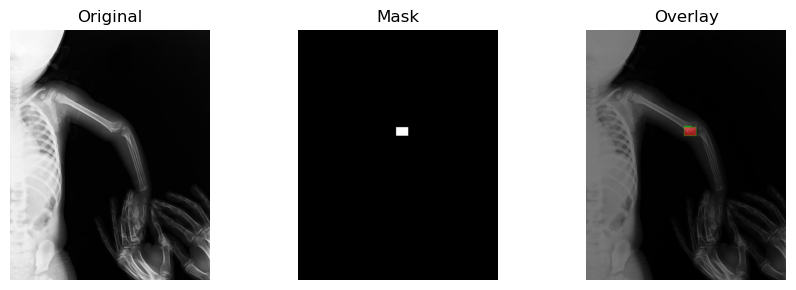


📌 Processing fractured image 5: IMG0000058.jpg
Parsed objects: [('fractured', 1189, 1349, 1285, 1511)]


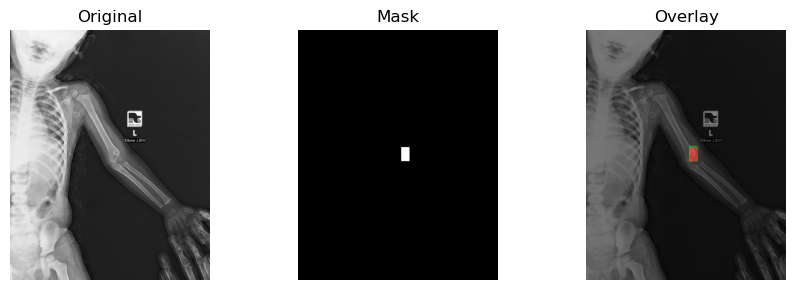

In [9]:
import os
import cv2
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Base directories
base_dir = r"D:\FracAtlas_extracted\FracAtlas"
images_dir = os.path.join(base_dir, "images", "Fractured")
xml_dir = os.path.join(base_dir, "Annotations", "PASCAL VOC")

# Get all fractured images
fractured_images = sorted(os.listdir(images_dir))

for idx, img_file in enumerate(fractured_images[:5]):
    print(f"\n📌 Processing fractured image {idx+1}: {img_file}")

    # --- Image & XML path ---
    image_path = os.path.join(images_dir, img_file)
    xml_filename = os.path.splitext(img_file)[0] + ".xml"
    xml_path = os.path.join(xml_dir, xml_filename)

    if not os.path.exists(xml_path):
        print(f"⚠️ No XML for {img_file}, skipping...")
        continue

    # --- Parse XML ---
    tree = ET.parse(xml_path)
    root = tree.getroot()

    objects = []
    for obj in root.findall("object"):
        label = obj.find("name").text.lower().strip()  # normalize
        bbox = obj.find("bndbox")

        xmin = int(float(bbox.find("xmin").text))
        ymin = int(float(bbox.find("ymin").text))
        xmax = int(float(bbox.find("xmax").text))
        ymax = int(float(bbox.find("ymax").text))

        objects.append((label, xmin, ymin, xmax, ymax))

    print("Parsed objects:", objects)

    # --- Load image ---
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        continue

    image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    height, width = image.shape[:2]

    # --- Mask initialization ---
    mask = np.zeros((height, width), dtype=np.uint8)

    # --- Fill mask from bounding boxes ---
    for (label, xmin, ymin, xmax, ymax) in objects:
        # clamp coordinates
        xmin = max(0, min(xmin, width - 1))
        xmax = max(0, min(xmax, width - 1))
        ymin = max(0, min(ymin, height - 1))
        ymax = max(0, min(ymax, height - 1))

        if xmax <= xmin or ymax <= ymin:
            continue

        mask[ymin:ymax, xmin:xmax] = 255  # white mask for object

    # --- Overlay ---
    colored_mask = np.zeros_like(image)
    colored_mask[mask > 0] = [255, 0, 0]  # Red for mask
    alpha = 0.5
    overlay = (image * (1 - alpha) + colored_mask * alpha).astype(np.uint8)

    for (label, xmin, ymin, xmax, ymax) in objects:
        cv2.rectangle(overlay, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        cv2.putText(overlay, label, (xmin, ymin - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # --- Show plots ---
    plt.figure(figsize=(9, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap="gray")
    plt.title("Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(overlay)
    plt.title("Overlay")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
